Combinaremos o preço de mercado do bitcoin com os dados de sentimentos do wikipedia

In [1]:
!pip install yfinance xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yf # Yahoo Finance API para ver o preço do Bitcoin
import os
import pandas as pd 

In [3]:
# visualização do bitcoin em relação ao dolar americano por meio da API do yahoo
btc_ticker = yf.Ticker("BTC-USD")

In [4]:
# histórico de mercado dos dados do bitcoin
btc = btc_ticker.history(period="max")
btc.index = btc.index.strftime("%Y-%m-%d")
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0
...,...,...,...,...,...,...,...
2022-10-23,19207.734375,19646.652344,19124.197266,19567.007812,22128794335,0,0
2022-10-24,19567.769531,19589.125000,19206.324219,19345.572266,30202235805,0,0
2022-10-25,19344.964844,20348.412109,19261.447266,20095.857422,47761524910,0,0


In [5]:
# convertendo o index em datetime
btc.index = pd.to_datetime(btc.index)

In [6]:
# deletar colunas Dividends e Stock Splits
del btc["Dividends"] 
del btc["Stock Splits"] 

In [7]:
# converter os nomes das colunas em minuscula
btc.columns = [column.lower() for column in btc.columns]
btc.head()

,open,high,low,close,volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


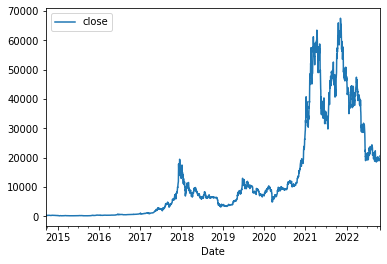

In [8]:
# linha dos preços do bitcoin fechados nos dias
btc.plot.line(y="close", use_index=True)

In [9]:
# leitura dos dados de análise de sentimentos dos comentários wikipedia
wiki = pd.read_csv("wikipedia_rolling_mean_edits.csv", index_col=0, parse_dates=True)
wiki

,edit_count,mean_sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2022-10-20,0.866667,-0.095021,0.224444
2022-10-21,0.700000,-0.097511,0.211111
2022-10-22,0.600000,-0.064256,0.177778
2022-10-23,0.700000,-0.033886,0.177778


In [10]:
btc = btc.merge(wiki, left_index=True, right_index=True)
btc

,open,high,low,close,volume,edit_count,mean_sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2022-10-20,19138.085938,19315.199219,18971.458984,19053.740234,24493974420,0.866667,-0.095021,0.224444
2022-10-21,19053.203125,19237.384766,18770.970703,19172.468750,32459287866,0.700000,-0.097511,0.211111
2022-10-22,19172.380859,19248.068359,19132.244141,19208.189453,16104440957,0.600000,-0.064256,0.177778
2022-10-23,19207.734375,19646.652344,19124.197266,19567.007812,22128794335,0.700000,-0.033886,0.177778


In [11]:
btc["tomorrow"] = btc["close"].shift(-1)
btc

,open,high,low,close,volume,edit_count,mean_sentiment,neg_sentiment,tomorrow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008
...,...,...,...,...,...,...,...,...,...
2022-10-20,19138.085938,19315.199219,18971.458984,19053.740234,24493974420,0.866667,-0.095021,0.224444,19172.468750
2022-10-21,19053.203125,19237.384766,18770.970703,19172.468750,32459287866,0.700000,-0.097511,0.211111,19208.189453
2022-10-22,19172.380859,19248.068359,19132.244141,19208.189453,16104440957,0.600000,-0.064256,0.177778,19567.007812
2022-10-23,19207.734375,19646.652344,19124.197266,19567.007812,22128794335,0.700000,-0.033886,0.177778,19345.572266


In [12]:
# variavel target -> 1: preço amanhã maior que de hoje, 0: preço de amanhã menor de que hoje
btc["target"] = (btc["tomorrow"] > btc["close"]).astype(int)


In [13]:
btc["target"].value_counts()

1    1584
0    1376
Name: target, dtype: int64

In [14]:
# visualizar nossas colunas depois da transformação
btc.head(2)

,open,high,low,close,volume,edit_count,mean_sentiment,neg_sentiment,tomorrow,target
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0


## Machine Learning Part

In [15]:
# utilizaremos o RandomForest pois por causa do gerenciamento melhor dos parametros, ele não causa overfit
from sklearn.ensemble import RandomForestClassifier

# nosso modelo
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

# não podemos randomizar a seleção de dados pois temos que respeitar o time-series do dataset
# lembrando que queremos prever o preço do BTC no dia seguinte a um dia, e prever o preço baseado em 2 anos anteriores.
train = btc.iloc[:-200]
test = btc.iloc[-200:]


predictors = ["close", "volume", "open", "high", "low", "edit_count", "mean_sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [16]:
from sklearn.metrics import precision_score

# utilizaremos o precision_score para avaliar a precisão do nosso modelo
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.45251396648044695

In [17]:
'''
    função predict
    para prever nossos dados e popula-los em uma Series 
'''
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [18]:
'''
    função backtest
    uma função que tem como objetivo prever os preços/valores de um ano, baseado em um conjunto de anos
    ex: prever o preço do BTC em 2018 baseado nos dados de 2014 a 2017, e depois os preços de 2019 baseado
        nos anos de 2014 a 2018.
    param start:  default value -> 1095. pois indica 3 anos anteriores
    param step: default value -> 150 pois indica 6 meses
'''

def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [19]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimator=200)
predictions = backtest(btc, model, predictors)

In [20]:
precision_score(predictions["target"], predictions["predictions"])

0.511094674556213

In [21]:
# adicionaremos mais features para melhorar a acurácia do nosso modelo, utilizando 'rolling window'
# e identificar tendencias nos nossos dados baseado em um intervalo de tempo, e features/colunas especificas
def compute_rolling(btc_df):
    horizons = [2, 7, 60, 365] # intervalo de dias em que o rolling window passar
    new_predictors = ["close", "mean_sentiment", "neg_sentiment"] # utilizaremos 

    for horizon in horizons:
        rolling_averages = btc_df.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        btc_df[ratio_column] = btc_df["close"] / rolling_averages["close"] # porcentagem em cima das médias em: 2, 7, 60, 365 dias

        edit_column = f"edit_count_{horizon}"
        btc_df[edit_column] = rolling_averages["edit_count"]

        rolling = btc.rolling(horizon, closed="left", min_periods=1).mean() # closed=left para tirar a linha atual e manter a anterior
        trend_column = f"trend_{horizon}"
        btc_df[trend_column] = rolling["target"]

        new_predictors += [ratio_column, trend_column, edit_column]
    return btc_df, new_predictors


In [22]:
btc, new_predictors = compute_rolling(btc.copy())
btc

,open,high,low,close,volume,edit_count,mean_sentiment,neg_sentiment,tomorrow,target,...,trend_2,close_ratio_7,edit_count_7,trend_7,close_ratio_60,edit_count_60,trend_60,close_ratio_365,edit_count_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232191,0.532718,424.440002,0,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-20,19138.085938,19315.199219,18971.458984,19053.740234,24493974420,0.866667,-0.095021,0.224444,19172.468750,1,...,0.0,0.990909,0.952381,0.285714,0.962063,0.694444,0.433333,0.533464,0.887306,0.463014
2022-10-21,19053.203125,19237.384766,18770.970703,19172.468750,32459287866,0.700000,-0.097511,0.211111,19208.189453,1,...,0.5,0.997181,0.909524,0.428571,0.969875,0.702222,0.450000,0.538566,0.886758,0.465753
2022-10-22,19172.380859,19248.068359,19132.244141,19208.189453,16104440957,0.600000,-0.064256,0.177778,19567.007812,1,...,1.0,0.997997,0.852381,0.571429,0.973586,0.707222,0.450000,0.541298,0.885845,0.468493
2022-10-23,19207.734375,19646.652344,19124.197266,19567.007812,22128794335,0.700000,-0.033886,0.177778,19345.572266,0,...,1.0,1.014389,0.804762,0.571429,0.993307,0.713889,0.466667,0.553196,0.885205,0.468493


In [23]:
predictions = backtest(btc, model, new_predictors)

In [24]:
precision_score(predictions["target"], predictions["predictions"]) 
# a acurácia do nosso modelo está melhor
# embora não tenha aumentado expressivamente.

0.5331991951710262

In [25]:
predictions

,target,predictions
2017-09-16,0,1
2017-09-17,1,0
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2022-10-20,1,0
2022-10-21,1,0
2022-10-22,1,1
2022-10-23,0,0
